# Text Preprocessing with NLTK and SpaCy
Prepared by: `Pat Pascual`

## Setup libraries and data loading

Ensure you have the necessary libraries. Import and set up essential libraries:

In [1]:
!pip install nltk spacy pandas matplotlib seaborn

In [2]:
!pip install --upgrade bottleneck

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.2/361.2 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.4.2
    Uninstalling Bottleneck-1.4.2:
      Successfully uninstalled Bottleneck-1.4.2


In [3]:
import pandas as pd

In [4]:
# load the dataset
df = pd.read_csv('/content/20-24-rappler-tech.csv')
df.shape

(4857, 9)

In [5]:
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732]
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]"
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732]
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]"


In [6]:
# Make sure titles are in str dtype
df['title.rendered'] = df['title.rendered'].astype(str)

## Text Preprocessing with NLTK

In [7]:
# Import libraries for nltk preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('punkt_tab')
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Tokenization

Breaking the text into individual words.

In [8]:
# Define function for tokenizing text
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization
df['tokens'] = df['title.rendered'].apply(tokenize_text)
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,tokens
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]","[Sam, Bankman-Fried, will, not, face, a, secon..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"[New, York, Times, sues, OpenAI, ,, Microsoft,..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]","[Elon, Musk, &, #, 8217, ;, s, X, fails, to, b..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"[China, &, #, 8217, ;, s, Xiaomi, unveils, fir..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]","[Apple, can, temporarily, sell, smartwatches, ..."


### Removing stop words, punctuation marks, and noise

Eliminating commonly occurring words, punctuation, and noise that may not add significant meaning.

In [9]:
# Set up stopwords
stop_words = set(stopwords.words('english'))

# Define function for noise removal
def remove_stopwords_punctuation_noise(tokens):
    return [word for word in tokens if word.lower() not in stop_words
            and word not in string.punctuation] # alternatively, word.isalnum()

# Apply noise removal
df['tokens_no_stopwords'] = df['tokens'].apply(
    remove_stopwords_punctuation_noise
)

df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,tokens,tokens_no_stopwords
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]","[Sam, Bankman-Fried, will, not, face, a, secon...","[Sam, Bankman-Fried, face, second, trial]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]","[Elon, Musk, &, #, 8217, ;, s, X, fails, to, b...","[Elon, Musk, 8217, X, fails, block, California..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"[China, &, #, 8217, ;, s, Xiaomi, unveils, fir...","[China, 8217, Xiaomi, unveils, first, electric..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, US, a..."


### Stemming

Reducing words to their base or root form.

In [10]:
# Set up PorterStemmer
ps = PorterStemmer()

# Define a function for stemming
def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

# Apply stemming
df['stemmed_tokens'] = df['tokens_no_stopwords'].apply(stem_tokens)

Check the effect of stemming on a few sample words

In [11]:
sample_words = ["running", "flies", "denying"]

stemmed_words = [ps.stem(word) for word in sample_words]
pd.DataFrame({'Original Word': sample_words, 'Stemmed Word': stemmed_words})

,Original Word,Stemmed Word
0,running,run
1,flies,fli
2,denying,deni


### Lemmatization

Converting words to their meaningful base form

In [12]:
# Set up WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
df['lemmatized_tokens'] = df['tokens_no_stopwords'].apply(lemmatize_tokens)

Let's compare the original word, stemmed word, and lemmatized word for the same set of sample words

In [13]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in sample_words]
pd.DataFrame({'Original Word': sample_words, 'Stemmed Word': stemmed_words,
              'Lemmatized Word': lemmatized_words})

,Original Word,Stemmed Word,Lemmatized Word
0,running,run,running
1,flies,fli,fly
2,denying,deni,denying


In [15]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [16]:
# Define a function to get the POS tag for a word
def get_wordnet_pos(word):
    # Map POS tag to the first character used by the WordNetLemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}.get(tag, 'n')
    return tag

# Adjust lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word))
            for word in tokens]

# Check samples
lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word))
                    for word in sample_words]

pd.DataFrame({'Original Word': sample_words, 'Stemmed Word': stemmed_words,
              'Lemmatized Word': lemmatized_words})

,Original Word,Stemmed Word,Lemmatized Word
0,running,run,run
1,flies,fli,fly
2,denying,deni,deny


## Text Preprocessing with SpaCy

In [17]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
# Import SpaCy library and load pre-trained model
import spacy

nlp = spacy.load('en_core_web_sm')

### Tokenization

Breaking the text into individual words

In [19]:
# Define a function for tokenization
def spacy_tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization
df['spacy_tokens'] = df['title.rendered'].apply(spacy_tokenize_text)
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]","[Sam, Bankman-Fried, will, not, face, a, secon...","[Sam, Bankman-Fried, face, second, trial]","[sam, bankman-fri, face, second, trial]","[Sam, Bankman-Fried, face, second, trial]","[Sam, Bankman, -, Fried, will, not, face, a, s..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co...","[new, york, time, sue, openai, microsoft, copy...","[New, York, Times, sue, OpenAI, Microsoft, cop...","[New, York, Times, sues, OpenAI, ,, Microsoft,..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]","[Elon, Musk, &, #, 8217, ;, s, X, fails, to, b...","[Elon, Musk, 8217, X, fails, block, California...","[elon, musk, 8217, x, fail, block, california,...","[Elon, Musk, 8217, X, fails, block, California...","[Elon, Musk&#8217;s, X, fails, to, block, Cali..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"[China, &, #, 8217, ;, s, Xiaomi, unveils, fir...","[China, 8217, Xiaomi, unveils, first, electric...","[china, 8217, xiaomi, unveil, first, electr, c...","[China, 8217, Xiaomi, unveils, first, electric...","[China&#8217;s, Xiaomi, unveils, first, electr..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, US, a...","[appl, temporarili, sell, smartwatch, us, appe...","[Apple, temporarily, sell, smartwatches, US, a...","[Apple, can, temporarily, sell, smartwatches, ..."


### Removing stop words and punctuation marks

Eliminating commonly occurring words, punctuation, and noise that may not add significant meaning

In [20]:
# Define a function for noise removal
def spacy_remove_stopwords_punctuation(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    return [token.text for token in doc if not token.is_stop
            and not token.is_punct]

# Apply removal of stop words and punctuation
df['spacy_tokens_no_stopwords'] = df['spacy_tokens'].apply(spacy_remove_stopwords_punctuation)
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]","[Sam, Bankman-Fried, will, not, face, a, secon...","[Sam, Bankman-Fried, face, second, trial]","[sam, bankman-fri, face, second, trial]","[Sam, Bankman-Fried, face, second, trial]","[Sam, Bankman, -, Fried, will, not, face, a, s...","[Sam, Bankman, Fried, face, second, trial]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co...","[new, york, time, sue, openai, microsoft, copy...","[New, York, Times, sue, OpenAI, Microsoft, cop...","[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]","[Elon, Musk, &, #, 8217, ;, s, X, fails, to, b...","[Elon, Musk, 8217, X, fails, block, California...","[elon, musk, 8217, x, fail, block, california,...","[Elon, Musk, 8217, X, fails, block, California...","[Elon, Musk&#8217;s, X, fails, to, block, Cali...","[Elon, Musk&#8217;s, X, fails, block, Californ..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"[China, &, #, 8217, ;, s, Xiaomi, unveils, fir...","[China, 8217, Xiaomi, unveils, first, electric...","[china, 8217, xiaomi, unveil, first, electr, c...","[China, 8217, Xiaomi, unveils, first, electric...","[China&#8217;s, Xiaomi, unveils, first, electr...","[China&#8217;s, Xiaomi, unveils, electric, car..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, US, a...","[appl, temporarili, sell, smartwatch, us, appe...","[Apple, temporarily, sell, smartwatches, US, a...","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, appea..."


### Lemmatization

Converting words to their meaningful base form

In [21]:
# Define a function for lemmatization
def spacy_lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply lemmatization
df['spacy_lemmatized_tokens'] = (
    df['spacy_tokens_no_stopwords'].apply(spacy_lemmatize_tokens)
)

df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]","[Sam, Bankman-Fried, will, not, face, a, secon...","[Sam, Bankman-Fried, face, second, trial]","[sam, bankman-fri, face, second, trial]","[Sam, Bankman-Fried, face, second, trial]","[Sam, Bankman, -, Fried, will, not, face, a, s...","[Sam, Bankman, Fried, face, second, trial]","[Sam, Bankman, Fried, face, second, trial]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co...","[new, york, time, sue, openai, microsoft, copy...","[New, York, Times, sue, OpenAI, Microsoft, cop...","[New, York, Times, sues, OpenAI, ,, Microsoft,...","[New, York, Times, sues, OpenAI, Microsoft, co...","[New, York, Times, sue, OpenAI, Microsoft, cop..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]","[Elon, Musk, &, #, 8217, ;, s, X, fails, to, b...","[Elon, Musk, 8217, X, fails, block, California...","[elon, musk, 8217, x, fail, block, california,...","[Elon, Musk, 8217, X, fails, block, California...","[Elon, Musk&#8217;s, X, fails, to, block, Cali...","[Elon, Musk&#8217;s, X, fails, block, Californ...","[Elon, musk&#8217;s, x, fail, block, Californi..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"[China, &, #, 8217, ;, s, Xiaomi, unveils, fir...","[China, 8217, Xiaomi, unveils, first, electric...","[china, 8217, xiaomi, unveil, first, electr, c...","[China, 8217, Xiaomi, unveils, first, electric...","[China&#8217;s, Xiaomi, unveils, first, electr...","[China&#8217;s, Xiaomi, unveils, electric, car...","[China&#8217;s, Xiaomi, unveil, electric, car,..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, US, a...","[appl, temporarili, sell, smartwatch, us, appe...","[Apple, temporarily, sell, smartwatches, US, a...","[Apple, can, temporarily, sell, smartwatches, ...","[Apple, temporarily, sell, smartwatches, appea...","[Apple, temporarily, sell, smartwatche, appeal..."


Let's compare the original word, stemmed word (using NLTK), and lemmatized word (using SpaCy) for the same set of sample words

In [22]:
sample_words = ["running", "flies", "denying"]

lemmatized_words_nltk = [lemmatizer.lemmatize(word)
                    for word in sample_words] # get_wordnet_pos(word)

lemmatized_words_spacy = [nlp(word)[0].lemma_ for word in sample_words]

pd.DataFrame({'Original Word': sample_words,
              'Lemmatized Word (NLTK)': lemmatized_words_nltk,
              'Lemmatized Word (SpaCy)': lemmatized_words_spacy})

,Original Word,Lemmatized Word (NLTK),Lemmatized Word (SpaCy)
0,running,running,run
1,flies,fly,fly
2,denying,denying,deny


## Exercise: NLTK and SpaCy Tokenization Outcomes

**Instructions**
* Compare the number of tokens generated by NLTK and SpaCy for the same set of titles and analyze any differences.
* Compare the distribution of token counts.
    - Calculate the average number of tokens per title for both NLTK and SpaCy tokenization.
    - Plot a bar graph showing the average number of tokens for NLTK vs. SpaCy.
* Analyze differences observed and possible reasons for them.
    - Check differences in tokens before and after noise removal for both NLTK and SpaCy.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### NLTK

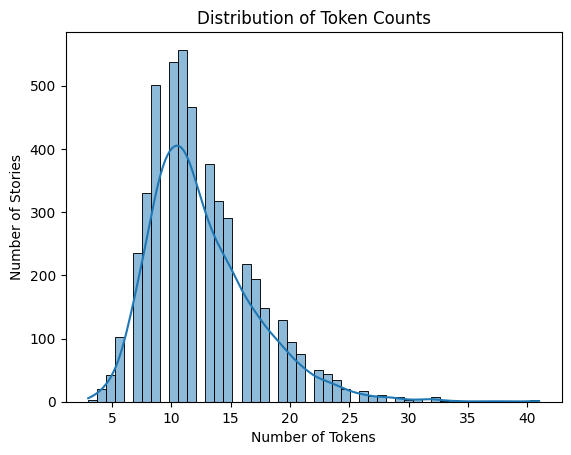

In [24]:
token_lengths = df['tokens'].apply(len)
sns.histplot(token_lengths, bins=50, kde=True)
plt.title('Distribution of Token Counts')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Stories')
plt.show()

In [25]:
nltk_word_count = Counter(df['tokens'].explode().tolist())
nltk_word_count.most_common(20)

[(';', 2090),
 ('#', 2084),
 ('&', 2071),
 ('to', 1672),
 (',', 1557),
 ('8217', 1385),
 ('in', 933),
 ('s', 810),
 ('of', 714),
 ('for', 694),
 ('8216', 648),
 ('on', 617),
 (':', 558),
 ('Facebook', 515),
 ('–', 490),
 ('US', 436),
 ('Twitter', 413),
 ('the', 409),
 ('’', 326),
 ('says', 322)]

In [26]:
nltk_word_count_no_stopwords = Counter(
    df['tokens_no_stopwords'].explode().tolist()
)

nltk_word_count_no_stopwords.most_common(20)

[('8217', 1385),
 ('8216', 648),
 ('Facebook', 515),
 ('–', 490),
 ('US', 436),
 ('Twitter', 413),
 ('’', 326),
 ('says', 322),
 ('Google', 311),
 ('AI', 255),
 ('Apple', 240),
 ('new', 217),
 ('Musk', 209),
 ('TikTok', 183),
 ('China', 180),
 ('data', 161),
 ('media', 153),
 ('Microsoft', 146),
 ('tech', 144),
 ('report', 144)]

### SpaCy

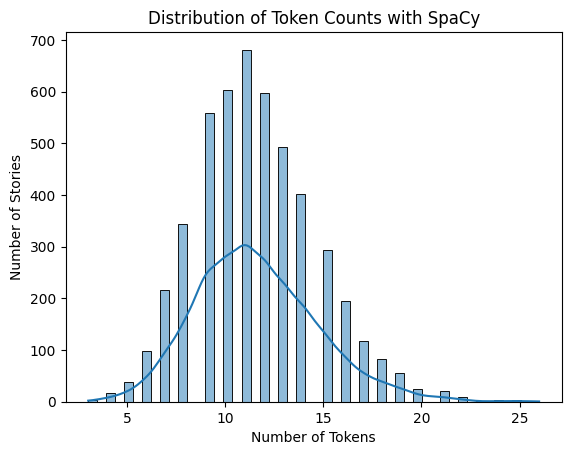

In [27]:
token_lengths_spacy = df['spacy_tokens'].apply(len)
sns.histplot(token_lengths_spacy, bins=50, kde=True)
plt.title('Distribution of Token Counts with SpaCy')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Stories')
plt.show()

In [28]:
spacy_word_count = Counter(df['spacy_tokens'].explode().tolist())
spacy_word_count.most_common(20)

[('to', 1677),
 (',', 1525),
 ('in', 943),
 ('-', 865),
 (';', 729),
 ('of', 717),
 ('for', 697),
 ('#', 677),
 ('&', 665),
 ('on', 630),
 (':', 557),
 ('–', 498),
 ('Facebook', 491),
 ('US', 447),
 ('the', 411),
 ('Twitter', 396),
 ('says', 322),
 ('Google', 296),
 ('with', 290),
 ('AI', 285)]

In [29]:
spacy_word_count_no_stopwords = Counter(
    df['spacy_tokens_no_stopwords'].explode().tolist()
)

spacy_word_count_no_stopwords.most_common(20)

[('Facebook', 491),
 ('Twitter', 396),
 ('says', 322),
 ('Google', 296),
 ('AI', 285),
 ('$', 262),
 ('new', 221),
 ('Apple', 215),
 ('TikTok', 180),
 ('Musk', 178),
 ('\xa0', 164),
 ('data', 162),
 ('China', 151),
 ('media', 150),
 ('report', 145),
 ('tech', 142),
 ('Microsoft', 138),
 ('5', 132),
 ('EU', 124),
 ('app', 122)]

### Comparison

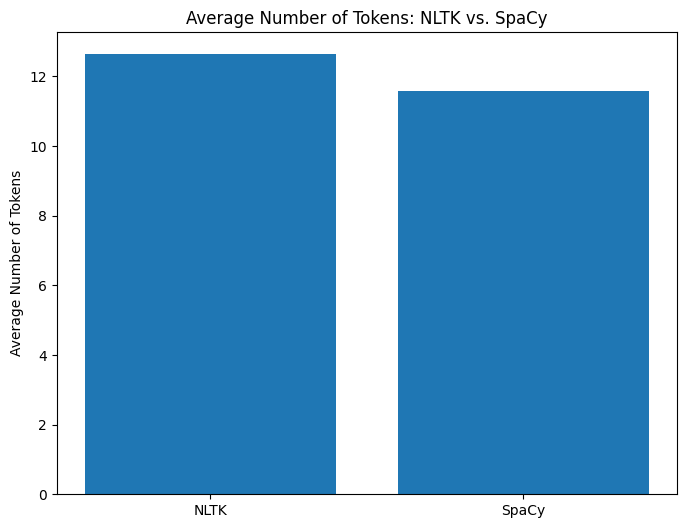

In [30]:
avg_tokens_nltk = token_lengths.mean()
avg_tokens_spacy = token_lengths_spacy.mean()

plt.figure(figsize=(8, 6))
plt.bar(['NLTK', 'SpaCy'], [avg_tokens_nltk, avg_tokens_spacy])
plt.title('Average Number of Tokens: NLTK vs. SpaCy')
plt.ylabel('Average Number of Tokens')
plt.show()